# Лабораторная работа 5.  Эвристические алгоритмы

**Цель работы:** ознакомление с  эвристическими алгоритмами  и методикой оценки  их эффективности.

**Барышев Михаил, Вариант - 5**



## Задание 1.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа.  

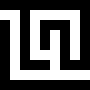


а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.



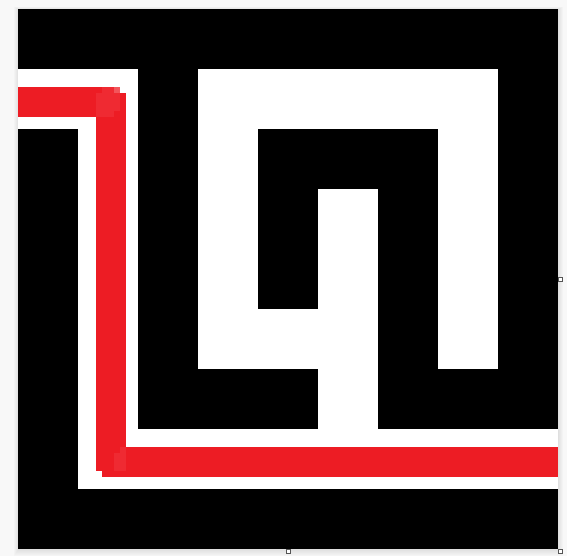

In [7]:
## Wave_algorithm

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #1
    [0, 0, 1, 0, 0, 0, 0, 0, 1], #2
    [1, 0, 1, 0, 1, 1, 1, 0, 1], #3
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #4
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #5
    [1, 0, 1, 0, 0, 0, 1, 0, 1], #6
    [1, 0, 1, 1, 1, 0, 1, 1, 1], #7
    [1, 0, 0, 0, 0, 0, 0, 0, 0], #8
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #9
]

start = (1, 0)
end = (7, 8)

### Creating wave-map
wave = [[-1 for j in range(len(maze[0]))] for i in range(len(maze))]
wave[start[0]][start[1]] = 0

queue = [start]

while queue:
    x, y = queue.pop(0)
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and wave[nx][ny] == -1 and maze[nx][ny] == 0:
            wave[nx][ny] = wave[x][y] + 1
            queue.append((nx, ny))

### Creating a path
path = [end]
x, y = end
while wave[x][y] != 0:
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and wave[nx][ny] == wave[x][y] - 1:
            x, y = nx, ny
            path.append((x, y))
            break

path.reverse()

if path is None:
    print("Error in path")
else:
    print("Optimal path:", path)

Optimal path: [(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)]


In [8]:
## Route algorithm

from queue import Queue

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #1
    [0, 0, 1, 0, 0, 0, 0, 0, 1], #2
    [1, 0, 1, 0, 1, 1, 1, 0, 1], #3
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #4
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #5
    [1, 0, 1, 0, 0, 0, 1, 0, 1], #6
    [1, 0, 1, 1, 1, 0, 1, 1, 1], #7
    [1, 0, 0, 0, 0, 0, 0, 0, 0], #8
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #9
]

def find_path(maze):
    start = (1, 0)
    end = (7, 8)
    q = Queue()
    q.put(start)
    visited = set()
    prev = {}
    while not q.empty():
        curr = q.get()
        if curr == end:
            break
        neighbors = [(curr[0]-1, curr[1]), (curr[0]+1, curr[1]), (curr[0], curr[1]-1), (curr[0], curr[1]+1)]
        for neighbor in neighbors:
            if neighbor[0] < 0 or neighbor[0] >= len(maze) or neighbor[1] < 0 or neighbor[1] >= len(maze[0]):
                continue
            if maze[neighbor[0]][neighbor[1]] == 1:
                continue
            if neighbor in visited:
                continue
            visited.add(neighbor)
            q.put(neighbor)
            prev[neighbor] = curr
    if end not in prev:
        return None
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = prev[curr]
    path.append(start)
    path.reverse()
    return path

path = find_path(maze)

if path is None:
    print("Error in path")
else:
    print("Optimal path:", path)


Optimal path: [(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)]


## Задание 2.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. 
Реализовав алгоритм в соответствии с заданием построить оптимальный путь через лабиринт.

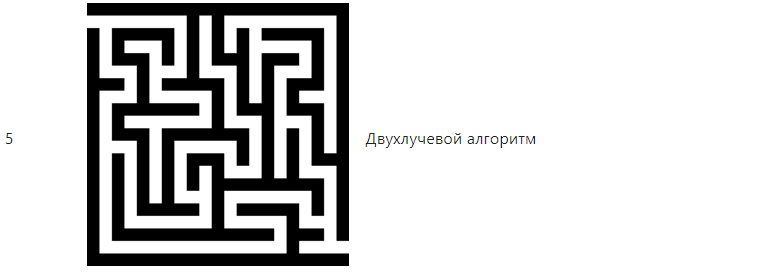


Евклидово расстояние: $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }$ (Двигаться можно по ветрикали, горизонтали и диагонали)

Манхэттенское расстояние:  $d = |x_2 - x_1| + |y_2 - y_1| $ (Двигаться можно только по горизонтали и вертикали)





In [1]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


def main():

    maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], #0
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #1
            [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], #2
            [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], #3
            [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], #4
            [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], #5
            [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], #6
            [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], #7
            [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], #8
            [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], #9
            [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], #10
            [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], #11
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], #12
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], #13
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], #14
            [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], #15
            [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], #16
            [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #17
            [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], #18
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #19
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], #20
           ]

    start = (0, 1)
    end = (19, 20)

    path = astar(maze, start, end)
    print(path)


if __name__ == '__main__':
    main()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\SeaDo\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SeaDo\AppData\Local\Temp\ipykernel_7084\3307783033.py", line 132, in <module>
    main()
  File "C:\Users\SeaDo\AppData\Local\Temp\ipykernel_7084\3307783033.py", line 127, in main
    path = astar(maze, start, end)
  File "C:\Users\SeaDo\AppData\Local\Temp\ipykernel_7084\3307783033.py", line -1, in astar
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SeaDo\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\SeaDo\miniconda3\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\SeaDo\minicond

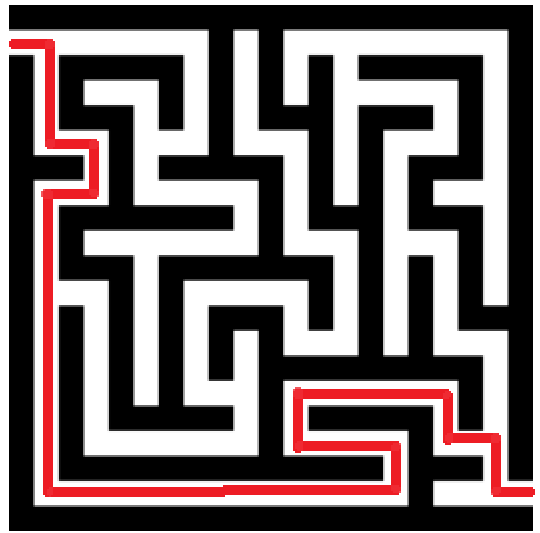

## Литература

Дональд Э. Кнут. Искусство программирования, том 2. Получисленные алгоритмы = The Art of Computer Programming, vol.2. Seminumerical Algorithms, 3-ed. — Вильямс, 2007. — С. 832. — ISBN 978-5-8459-0081-4.

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.